In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/fashion-mnist_test.csv


Let's read the csv files using pandas read_csv which provides data in form of pandas dataframe.

In [2]:
import pandas as pd 
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv', sep = ',')

Let's have a look at the data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here 1st column is label and rest of columns have values for the 784 pixels - 28 x 28 image size. 

In [4]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [5]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

Check if there is any NaN value or not

In [6]:
print(train_df.isnull().any().sum())
print(test_df.isnull().any().sum())

0
0


Convert dataframes into numpy array so it can be feed to the convolution neural network which will be created using tensorflow and keras.

In [7]:
import numpy as np
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Separate label data as y and image data as x and rescale it to (0,1) range from (0,255) range

In [8]:
x_train = train_data[:,1:]/255 #Skip 1st column as it is a label data
y_train = train_data[:,0] # 1st column is label
x_test= test_data[:,1:]/255
y_test=test_data[:,0]

Split training data as 80% training set and 20% validation set using scikit learn's train_test_split method.
Validation set will not update weights and bias of the neural network. 
It is used to verify neural network performance before validating on test data.

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 1)
print("x_train shape: " + str(x_train.shape))
print("x_validate shape: " + str(x_validate.shape))
print("x_test shape: " + str(x_test.shape))
print("y_train shape: " + str(y_train.shape))
print("y_validate shape: " + str(y_validate.shape))
print("y_test shape: " + str(y_test.shape))

x_train shape: (48000, 784)
x_validate shape: (12000, 784)
x_test shape: (10000, 784)
y_train shape: (48000,)
y_validate shape: (12000,)
y_test shape: (10000,)


Reshape the x data array in the shape (no of elements, image height, image width, channels). As these are not RGB image, here channel is 1.

In [10]:
height = width = 28
x_train = x_train.reshape(x_train.shape[0],height,width,1)
x_validate = x_validate.reshape(x_validate.shape[0],height,width,1)
x_test = x_test.reshape(x_test.shape[0],height,width,1)
print("x_train shape: " + str(x_train.shape))
print("x_validate shape: " + str(x_validate.shape))
print("x_test shape: " + str(x_test.shape))

x_train shape: (48000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


Let's define a CNN model.

In [11]:
from keras.models import Sequential
from keras.layers import Activation,Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),kernel_initializer='glorot_uniform',input_shape=(height, width, 1),name='conv0'))
model.add(BatchNormalization(axis = 1, name = 'bn0'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_pool0'))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, kernel_size=(3, 3), name='conv1'))
model.add(BatchNormalization(axis = 1, name = 'bn1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_pool1'))
model.add(Dropout(0.25))
          
model.add(Conv2D(128, (3, 3), activation='relu', name='conv2'))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu',name = 'fc'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv0 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 26, 26, 32)        104       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
bn1 (BatchNormalization)     (None, 11, 11, 64)       

Plot the model

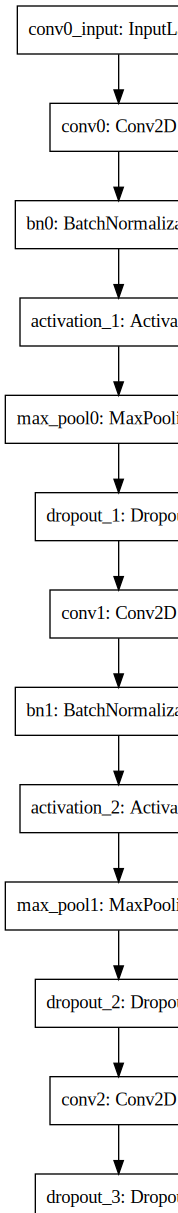

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Compile the model

In [13]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer= 'Adam',metrics =['accuracy'])

Train the model on fix number of epochs (iteration of training set).
Here batch size indicate that after 128 training data (here 1 batch) weights and bias updates during single epoch training.

In [14]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.7994 - accuracy: 0.7045 - val_loss: 0.5970 - val_accuracy: 0.8288
Epoch 2/50
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4943 - accuracy: 0.8182 - val_loss: 0.3717 - val_accuracy: 0.8605
Epoch 3/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.4301 - accuracy: 0.8424 - val_loss: 0.3407 - val_accuracy: 0.8726
Epoch 4/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3980 - accuracy: 0.8542 - val_loss: 0.3237 - val_accuracy: 0.8808
Epoch 5/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3718 - accuracy: 0.8635 - val_loss: 0.3077 - val_accuracy: 0.8844
Epoch 6/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3584 - accuracy: 0.8696 - val_loss: 0.2970 - val_accuracy: 0.8908
Epoch 7/50
48000/48000 [==============================] - 54s 1ms/st

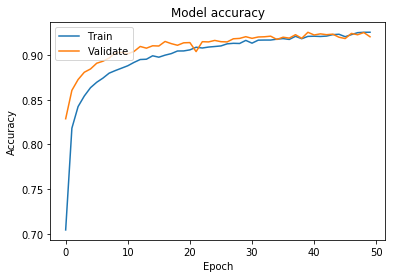

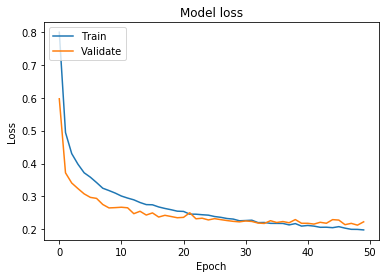

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

Let's evaluate the model on test set

In [16]:
score = model.evaluate(x_test, y_test)
print('Loss: '+ str(score[0]))
print('Accuracy: '+ str(score[1]))

10000/10000 [==============================] - 4s 375us/step
Loss: 0.2024013391792774
Accuracy: 0.9254999756813049


Let's have a look at classification report which provides details about precision, recall and f1-score.

In [17]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted
y_true = test_df.iloc[:, 0]

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, predicted_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.83      0.92      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.88      0.91      0.89      1000
       Dress       0.92      0.95      0.93      1000
        Coat       0.90      0.88      0.89      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.82      0.70      0.76      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000



Let's check model's performance using confution matrix.

[More details on confusion matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

[Other ways to evaluate model's performance](https://towardsdatascience.com/various-ways-to-evaluate-a-machine-learning-models-performance-230449055f15)

In [18]:
confusion_mtx = confusion_matrix(y_true, predicted_classes) 
print(confusion_mtx)

[[916   1  16  13   1   0  49   0   4   0]
 [  1 991   0   6   1   0   1   0   0   0]
 [ 11   0 907  10  27   0  41   0   4   0]
 [ 19   3   1 946  16   0  14   0   0   1]
 [  2   0  47  22 883   1  44   0   1   0]
 [  0   0   0   0   0 977   0  17   1   5]
 [155   2  57  29  51   0 703   0   3   0]
 [  0   0   0   0   0   3   0 982   0  15]
 [  1   0   6   0   1   1   1   1 988   1]
 [  0   0   0   0   0   2   0  36   0 962]]


Let's plot the confution matrix for better visulization

Text(0.5, -28.875, 'Predicted label')

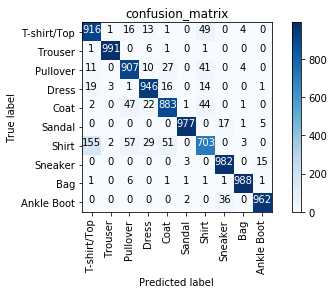

In [19]:
import itertools
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Let's check few items which are predicted correctly.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


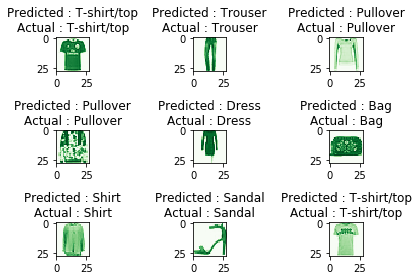

In [20]:
correct = np.nonzero(predicted_classes==y_true)[0]
i = 1
for correct in np.nditer(correct[:9]):
    plt.subplot(3,3,i)
    i += 1
    plt.imshow(x_test[correct].reshape(28,28), cmap='Greens', interpolation='none')
    plt.title("Predicted : " + str(clothing[predicted_classes[correct]]) + "\n"+"Actual : " + str(clothing[y_true[correct]]))
    plt.tight_layout()

Let's check few items which are predicted incorrectly.

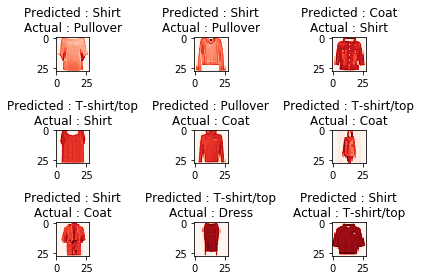

In [21]:
incorrect = np.nonzero(predicted_classes!=y_true)[0]
i = 1
for incorrect in np.nditer(incorrect[:9]):
    plt.subplot(3,3,i)
    i += 1
    print()
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='Reds', interpolation='none')
    plt.title("Predicted : " + str(clothing[predicted_classes[incorrect]]) + "\n"+"Actual : " + str(clothing[y_true[incorrect]]))
    plt.tight_layout()